# Resource usage (memory, total CPU time, and cpu scaling with threads)
Using Slurm and pyseff, we can get the runtime and memory usage of each tool.  


## Part 1: of the real data (all/fractions of hq imgvr4 with iphop spacers)
This is only for the fractions: ['0.001', '0.005', '0.01', '0.05', '0.1'], of the HQ IMG/VR4 contigs with the iphop spacer, when testing tools with either no restrictions on maximum distance, or up to 3/5 (edir or hamming, actual values are in Prepare_all_jobs.ipynb).

In [69]:
import os
os.chdir('/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/')
from bench import *
from bench.utils.functions import *
from bench.utils.pyseff import *
import polars as pl
pl.Config(tbl_rows=110)

base_dir = "/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/results/real_data/subsamples/fraction_0.001/" # just need one to get the configs
threads = 12
tools_versions = pl.read_csv("tool_configs/tool_versions.csv")
tool_configs = load_tool_configs(base_dir)
tool_names = list(tool_configs.keys())
tool_names

['blastn',
 'bowtie1',
 'bowtie2',
 'indelfree_bruteforce',
 'indelfree_indexed',
 'minimap2',
 'mmseqs2',
 'mummer4',
 'sassy',
 'strobealign',
 'x_mapper']

In [70]:
sacct_df = pyseff(remove_cancelled=False,remove_failed=False,calculate_cpu_efficiency=False,calculate_memory_efficiency=False)
sacct_df= sacct_df.with_columns(pl.col("JobName").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2"))
sacct_df = sacct_df.filter(~pl.col("JobName").str.contains_any(["damn","biofaster"])).filter(pl.col("JobName").str.contains_any(tool_names))
sacct_df

BaseJobID,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""20668298""","""strobealign""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""20668661""","""mummer4""",38,"[""COMPLETED""]","[""0:0""]","""2426544K""","""168G""",3102,16720,2369.671875,172032.0,"""00:51:42""","""04:38:40"""
"""20668285""","""sassy""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""20668651""","""mummer4""",38,"[""COMPLETED""]","[""0:0""]","""449068K""","""168G""",930,0,438.542969,172032.0,"""00:15:30""","""00:00:00"""
"""20263949""","""indelfree_bruteforce""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""20697932""","""mmseqs2""",38,"[""COMPLETED""]","[""0:0""]","""11834740K""","""168G""",87,0,11557.363281,172032.0,"""00:01:27""","""00:00:00"""
"""20668619""","""x_mapper""",38,"[""COMPLETED""]","[""0:0""]","""6361868K""","""168G""",105,0,6212.761719,172032.0,"""00:01:45""","""00:00:00"""
"""20668644""","""blastn""",38,"[""CANCELLED by 91591"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""141052024K""","""168G""",585396,1040696,137746.117188,172032.0,"""6-18:36:36""","""12-01:04:56"""
"""19675910""","""mmseqs2""",16,"[""COMPLETED""]","[""0:0""]","""10839436K""","""168G""",258,0,10585.386719,172032.0,"""00:04:18""","""00:00:00"""


Get all jobids that are actually needed

In [71]:
import glob
# fraction_dirs = glob.glob(os.path.join("results/real_data/subsamples/fraction_*"))
log_files = glob.glob("results/real_data/subsamples/fraction_*/slurm_logs/*.out")
# next - into a df with jobid, fraction, and tool name
log_files_df = pl.DataFrame({
    "log_file": log_files
}).with_columns(
    pl.col("log_file").str.extract(r"-(\d+)\.out").alias("BaseJobID"),
    pl.col("log_file").str.extract(r"fraction_([\d.]+)").alias("fraction"),
    pl.col("log_file").str.extract(r"slurm_logs/(.+)-\d+\.out").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2").alias("tool_name")
)
log_files_df = log_files_df.join(sacct_df, on="BaseJobID", how="inner")
log_files_df
# sacct_df.filter(~pl.col("JobName").is_in(log_files_df["tool_name"]))
# log_files_df.filter(~pl.col("tool_name").is_in(sacct_df["JobName"]))

log_file,BaseJobID,fraction,tool_name,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,str,str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""results/real_data/subsamples/fraction_0.05/slurm_logs/blastn-20668644.out""","""20668644""","""0.05""","""blastn""","""blastn""",38,"[""CANCELLED by 91591"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""141052024K""","""168G""",585396,1040696,137746.117188,172032.0,"""6-18:36:36""","""12-01:04:56"""
"""results/real_data/subsamples/fraction_0.1/slurm_logs/mummer4-20668661.out""","""20668661""","""0.1""","""mummer4""","""mummer4""",38,"[""COMPLETED""]","[""0:0""]","""2426544K""","""168G""",3102,16720,2369.671875,172032.0,"""00:51:42""","""04:38:40"""
"""results/real_data/subsamples/fraction_0.05/slurm_logs/mummer4-20668651.out""","""20668651""","""0.05""","""mummer4""","""mummer4""",38,"[""COMPLETED""]","[""0:0""]","""449068K""","""168G""",930,0,438.542969,172032.0,"""00:15:30""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/x_mapper-20668619.out""","""20668619""","""0.001""","""x_mapper""","""x_mapper""",38,"[""COMPLETED""]","[""0:0""]","""6361868K""","""168G""",105,0,6212.761719,172032.0,"""00:01:45""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/blastn-20668620.out""","""20668620""","""0.005""","""blastn""","""blastn""",38,"[""COMPLETED""]","[""0:0""]","""176147396K""","""168G""",359847,1126402,172018.941406,172032.0,"""4-03:57:27""","""13-00:53:22"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/minimap2-20668626.out""","""20668626""","""0.005""","""minimap2""","""minimap2""",38,"[""COMPLETED""]","[""0:0""]","""1176832K""","""168G""",528,0,1149.25,172032.0,"""00:08:48""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/bowtie2-20668622.out""","""20668622""","""0.005""","""bowtie2""","""bowtie2""",38,"[""COMPLETED""]","[""0:0""]","""1149604K""","""168G""",576,0,1122.660156,172032.0,"""00:09:36""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.05/slurm_logs/mmseqs-20668650.out""","""20668650""","""0.05""","""mmseqs2""","""mmseqs2""",38,"[""COMPLETED""]","[""0:0""]","""16046072K""","""168G""",258,0,15669.992188,172032.0,"""00:04:18""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/bowtie1-20668609.out""","""20668609""","""0.001""","""bowtie1""","""bowtie1""",38,"[""COMPLETED""]","[""0:0""]","""529268K""","""168G""",153,0,516.863281,172032.0,"""00:02:33""","""00:00:00"""


In [72]:
# Get contig counts and total sizes for each fraction
fraction_dirs = glob.glob("results/real_data/subsamples/fraction_*")
contig_counts = []

for fdir in sorted(fraction_dirs):
    fraction = fdir.split("fraction_")[-1]
    metadata_file = os.path.join(fdir, "subsampled_data/subsampled_metadata.tsv")
    
    if os.path.exists(metadata_file):
        # Read metadata to get counts and sizes
        metadata_df = pl.read_csv(metadata_file, separator='\t')
        num_contigs = len(metadata_df)
        total_size_bp = metadata_df["length"].sum()
        
        contig_counts.append({
            "fraction": fraction,
            "fraction_float": float(fraction),
            "num_contigs": num_contigs,
            "total_size_bp": total_size_bp,
            "total_size_Mbp": total_size_bp / 1_000_000
        })

contig_counts_df = pl.DataFrame(contig_counts).sort("fraction_float")
print("Contig counts and sizes by fraction:")
print(contig_counts_df)

Contig counts and sizes by fraction:
shape: (7, 5)
┌──────────┬────────────────┬─────────────┬───────────────┬────────────────┐
│ fraction ┆ fraction_float ┆ num_contigs ┆ total_size_bp ┆ total_size_Mbp │
│ ---      ┆ ---            ┆ ---         ┆ ---           ┆ ---            │
│ str      ┆ f64            ┆ i64         ┆ i64           ┆ f64            │
╞══════════╪════════════════╪═════════════╪═══════════════╪════════════════╡
│ 0.0005   ┆ 0.0005         ┆ 279         ┆ 7036591       ┆ 7.036591       │
│ 0.001    ┆ 0.001          ┆ 421         ┆ 9745671       ┆ 9.745671       │
│ 0.005    ┆ 0.005          ┆ 2107        ┆ 57059412      ┆ 57.059412      │
│ 0.01     ┆ 0.01           ┆ 4214        ┆ 123668270     ┆ 123.66827      │
│ 0.05     ┆ 0.05           ┆ 21071       ┆ 715073062     ┆ 715.073062     │
│ 0.1      ┆ 0.1            ┆ 42143       ┆ 1504536616    ┆ 1504.536616    │
│ 1        ┆ 1.0            ┆ 421431      ┆ 18870643188   ┆ 18870.643188   │
└──────────┴─────────────

In [73]:
# Get spacer counts and total size (same for all fractions)
spacer_file = "imgvr4_data/spacers/iphop_filtered_spacers.fna"

spacer_df = pl.DataFrame(read_fasta_needletail(spacer_file), schema={'seqid': pl.Utf8, 'seq': pl.Utf8},)
spacer_df = spacer_df.with_columns(
    pl.col("seq").str.len_chars().alias("length")
).drop("seq")
num_spacers = spacer_df.height
total_spacer_bp = spacer_df["length"].sum()
total_spacer_Mbp = total_spacer_bp / 1_000_000

print("Spacer dataset (constant across all fractions):")
print(f"  Number of spacers: {num_spacers:,}")
print(f"  Total length: {total_spacer_bp:,} bp ({total_spacer_Mbp:.2f} Mbp)")

Spacer dataset (constant across all fractions):
  Number of spacers: 3,826,979
  Total length: 129,494,053 bp (129.49 Mbp)


In [74]:
# Check the relationship between Elapsed and TotalCPU to understand the metrics
# Elapsed_Seconds should be wall-clock time, TotalCPU_Seconds is actual CPU time used
sample_check = log_files_df.select([
    "tool_name", "fraction", "AllocCPUS", "Elapsed_Seconds", "TotalCPU_Seconds"
]).head(20)

print("Sample of timing data:")
print(sample_check)

# Check if we have TotalCPU data
if "TotalCPU_Seconds" in log_files_df.columns:
    print("\n✓ TotalCPU_Seconds is available - this is the actual CPU time used")
    print("✓ Elapsed_Seconds is wall-clock time")
else:
    print("\n⚠ Only Elapsed_Seconds available")

# Check CPU allocation variations
cpu_check = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long")
]).group_by(["tool_name", "is_long"]).agg([
    pl.col("AllocCPUS").unique().alias("CPU_values"),
    pl.len().alias("count")
]).sort("tool_name")

print("\nCPU allocation by tool and retry status:")
print(cpu_check)

Sample of timing data:
shape: (20, 5)
┌───────────────────┬──────────┬───────────┬─────────────────┬──────────────────┐
│ tool_name         ┆ fraction ┆ AllocCPUS ┆ Elapsed_Seconds ┆ TotalCPU_Seconds │
│ ---               ┆ ---      ┆ ---       ┆ ---             ┆ ---              │
│ str               ┆ str      ┆ i64       ┆ u32             ┆ u32              │
╞═══════════════════╪══════════╪═══════════╪═════════════════╪══════════════════╡
│ blastn            ┆ 0.05     ┆ 38        ┆ 585396          ┆ 1040696          │
│ mummer4           ┆ 0.1      ┆ 38        ┆ 3102            ┆ 16720            │
│ mummer4           ┆ 0.05     ┆ 38        ┆ 930             ┆ 0                │
│ x_mapper          ┆ 0.001    ┆ 38        ┆ 105             ┆ 0                │
│ blastn            ┆ 0.005    ┆ 38        ┆ 359847          ┆ 1126402          │
│ minimap2          ┆ 0.005    ┆ 38        ┆ 528             ┆ 0                │
│ bowtie2           ┆ 0.005    ┆ 38        ┆ 576            

In [75]:
# Add max_distance information to log_files_df
def get_max_distance(tool_name, fraction_float):
    """
    Determine the max_distance setting for a given tool and fraction.
    
    Returns a string describing the max_distance setting:
    - For tools with fixed edit distance (indelfree, sassy): returns the numeric value
    - For bowtie1: always returns "3" (max supported)
    - For blastn/mmseqs2: returns descriptive text about their similarity thresholds
    - For other tools: returns "N/A"
    """
    # Determine the configured max_distance based on fraction size
    if fraction_float in [0.0005, 0.001, 0.005, 0.001]:
        configured_max_dist = 5
    elif fraction_float in [0.05, 0.1]:
        configured_max_dist = 3
    elif fraction_float == 1.0:
        configured_max_dist = 3
    else:
        configured_max_dist = None
    
    # Tool-specific handling
    if tool_name in ['indelfree_bruteforce', 'indelfree_indexed', 'sassy']:
        # These tools use the configured max_distance parameter
        return str(configured_max_dist) if configured_max_dist is not None else "N/A"
    elif tool_name == 'bowtie1':
        # bowtie1 always uses max_distance=3 (maximum supported with -v flag)
        return "3"
    elif tool_name == 'blastn':
        # blastn uses perc_identity and qcov_hsp_perc, not fixed edit distance
        return "perc_id=84%"
    elif tool_name == 'mmseqs2':
        # mmseqs2 uses min-seq-id, not fixed edit distance
        return "min-seq-id=85%"
    else:
        # Other tools (bowtie2, minimap2, strobealign, mummer4, x_mapper) don't use max_distance
        return "N/A"

# Apply the function to add max_distance column
log_files_df = log_files_df.with_columns([
    pl.struct(["tool_name", "fraction"]).map_elements(
        lambda x: get_max_distance(x["tool_name"], x["fraction"]),
        return_dtype=pl.Utf8
    ).alias("max_distance_setting")
])

print("Max distance settings by tool and fraction:")
max_dist_summary = log_files_df.group_by(["tool_name", "fraction", "max_distance_setting"]).agg([
    pl.len().alias("count")
]).sort(["tool_name", "fraction"])
print(max_dist_summary)

Max distance settings by tool and fraction:
shape: (70, 4)
┌──────────────────────┬──────────┬──────────────────────┬───────┐
│ tool_name            ┆ fraction ┆ max_distance_setting ┆ count │
│ ---                  ┆ ---      ┆ ---                  ┆ ---   │
│ str                  ┆ str      ┆ str                  ┆ u64   │
╞══════════════════════╪══════════╪══════════════════════╪═══════╡
│ blastn               ┆ 0.0005   ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.001    ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.005    ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.01     ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.05     ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.1      ┆ perc_id=84%          ┆ 2     │
│ bowtie1              ┆ 0.0005   ┆ 3                    ┆ 1     │
│ bowtie1              ┆ 0.001    ┆ 3                    ┆ 1     │
│ bowtie1              ┆ 0.005    ┆ 3                    ┆ 1     │
│ b

## Determine max_distance settings for each tool

Based on the Prepare_all_jobs.ipynb notebook:
- Smaller fractions (0.0005, 0.001, 0.005, 0.01): max_distance=5
- Larger fractions (0.05, 0.1): max_distance=3
- Full dataset (1): max_distance=3

Tool-specific notes:
- **bowtie1**: Always uses max_distance=3 (maximum it supports with -v flag)
- **blastn**: Uses perc_identity=84 and qcov_hsp_perc=80, not a fixed edit distance
- **mmseqs2**: Uses min-seq-id=0.85, not a fixed edit distance
- **indelfree_bruteforce/indexed**: Use the configured max_distance (subs parameter)
- **sassy**: Uses the configured max_distance (-k parameter)

# Process jobs accounting for retries and fraction sizes

Key considerations:
- Multiple fraction sizes tested (0.001, 0.01, 0.1, etc.)
- Some jobs timed out and were resubmitted with "_long" suffix (may have different QOS/CPU allocation)
- For each tool-fraction combination, prefer completed jobs (prioritize _long if both exist)
- Track CPU allocations as they may differ between regular and _long jobs
- Report TIMEOUT only if all attempts failed for that tool-fraction

In [76]:
# Process log_files_df to handle regular and _long jobs
# First, identify which jobs are regular vs _long retries
log_files_df = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long_retry"),
    pl.col("tool_name").alias("base_tool_name"),  # already has _long stripped
    pl.col("fraction").cast(pl.Float64).alias("fraction_float")  # for sorting/plotting
])

# Check job states - categorize them
log_files_df = log_files_df.with_columns([
    pl.col("State").list.get(0).alias("state_first"),  # Get first state from list
])

# Mark jobs to exclude (OOM, CANCELLED, PREEMPTED) and timeout
exclude_states = ['OUT_OF_MEMORY', 'CANCELLED', 'PREEMPTED',"RUNNING"]
log_files_df = log_files_df.with_columns([
    pl.col("state_first").is_in(exclude_states).alias("should_exclude"),
    pl.col("state_first").str.contains("TIMEOUT").fill_null(False).alias("is_timeout"),
    pl.col("state_first").str.contains("COMPLETED").fill_null(False).alias("is_completed"),
    pl.col("state_first").str.contains("FAILED").fill_null(False).alias("is_failed"),
])

# For each (tool, fraction) pair, select the best job
# Priority: _long completed > regular completed > mark failed/timeout
job_selection = log_files_df.group_by(["base_tool_name", "fraction"]).agg([
    pl.all(),
])

def select_best_job(group_df):
    """Select the best job from regular/_long pair for each tool-fraction combination"""
    results = []
    
    for row in group_df.iter_rows(named=True):
        tool = row["base_tool_name"]
        fraction = row["fraction"]
        
        # Get all jobs for this tool-fraction pair
        is_long = row["is_long_retry"]
        should_exclude = row["should_exclude"]
        is_completed = row["is_completed"]
        is_timeout = row["is_timeout"]
        is_failed = row["is_failed"]
        jobids = row["BaseJobID"]
        elapsed = row["Elapsed_Seconds"]
        total_cpu = row.get("TotalCPU_Seconds", elapsed)  # fallback to elapsed if no TotalCPU
        maxrss = row["MaxRSS_MB"]
        reqmem = row["ReqMem_MB"]
        alloccpus = row["AllocCPUS"]
        max_distance = row["max_distance_setting"]
        
        # Filter out excluded jobs (OOM, CANCELLED, PREEMPTED)
        valid_indices = [i for i, excl in enumerate(should_exclude) if not excl]
        
        if not valid_indices:
            continue  # All jobs excluded, skip
        
        # Separate regular and long jobs
        regular_idx = [i for i in valid_indices if not is_long[i]]
        long_idx = [i for i in valid_indices if is_long[i]]
        
        # Selection priority:
        # 1. _long completed
        # 2. regular completed  
        # 3. Mark as FAILED/TIMEOUT if all attempts failed
        
        selected_idx = None
        status = None
        replaced_failed_job = False
        
        # Check _long jobs first
        if long_idx:
            long_i = long_idx[0]
            if is_completed[long_i]:
                selected_idx = long_i
                status = "COMPLETED"
                # Check if this replaced a failed regular job
                if regular_idx and (is_timeout[regular_idx[0]] or is_failed[regular_idx[0]]):
                    replaced_failed_job = True
            elif is_timeout[long_i] or is_failed[long_i]:
                # _long also failed
                selected_idx = long_i
                status = "FAILED" if is_failed[long_i] else "TIMEOUT"
        
        # If no _long or _long didn't work, try regular
        if selected_idx is None and regular_idx:
            reg_i = regular_idx[0]
            if is_completed[reg_i]:
                selected_idx = reg_i
                status = "COMPLETED"
            elif is_timeout[reg_i] or is_failed[reg_i]:
                if not long_idx:  # Only report failure if no _long exists
                    selected_idx = reg_i
                    status = "FAILED" if is_failed[reg_i] else "TIMEOUT"
        
        if selected_idx is not None:
            # Use TotalCPU_Seconds if available and non-zero, otherwise Elapsed_Seconds
            # For very fast jobs, Slurm reports TotalCPU as 0, so we need to use wall time
            cpu_time_raw = total_cpu[selected_idx] if isinstance(total_cpu, list) else elapsed[selected_idx]
            elapsed_time = elapsed[selected_idx]
            
            # If TotalCPU is 0 or very small (< 1 second), use Elapsed instead
            # This handles fast jobs where Slurm doesn't capture CPU time accurately
            if cpu_time_raw < 1:
                cpu_time = elapsed_time
            else:
                cpu_time = cpu_time_raw
            
            results.append({
                "tool": tool,
                "fraction": fraction,
                "fraction_float": float(fraction) if fraction else 0,
                "BaseJobID": jobids[selected_idx],
                "status": status,
                "is_long_retry": is_long[selected_idx],
                "replaced_failed_job": replaced_failed_job,
                "Elapsed_Seconds": elapsed_time,
                "CPU_Time_Seconds": cpu_time,
                "MaxRSS_MB": maxrss[selected_idx],
                "ReqMem_MB": reqmem[selected_idx],
                "AllocCPUS": alloccpus[selected_idx],
                "Peak_Memory_Gb": maxrss[selected_idx] / 1024 if maxrss[selected_idx] else None,
                "CPU_Time_Hours": cpu_time / 3600,
                "Walltime_Hours": elapsed_time / 3600,
                "max_distance": max_distance[selected_idx] if isinstance(max_distance, list) else max_distance,
            })
    
    return pl.DataFrame(results) if results else pl.DataFrame()

# Apply selection
processed_jobs = select_best_job(job_selection)
processed_jobs = processed_jobs.sort(["tool", "fraction_float"])

print(f"Total jobs processed: {len(processed_jobs)}")
print(f"Unique tools: {processed_jobs['tool'].n_unique()}")
# print(f"Unique fractions: {sorted(processed_jobs['fraction'].unique().to_list())}")
print(f"\nJobs using _long retry: {processed_jobs['is_long_retry'].sum()}")
print(f"Jobs that replaced failed attempts: {processed_jobs['replaced_failed_job'].sum()}")

processed_jobs

Total jobs processed: 68
Unique tools: 11

Jobs using _long retry: 0
Jobs that replaced failed attempts: 0


tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,max_distance
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64,str
"""blastn""","""0.0005""",0.0005,"""20668596""","""COMPLETED""",false,false,127207,329398,0.0,172032.0,38,null,91.499444,35.335278,"""perc_id=84%"""
"""blastn""","""0.001""",0.001,"""20697880""","""COMPLETED""",false,false,1971,32472,646.699219,172032.0,38,0.631542,9.02,0.5475,"""perc_id=84%"""
"""blastn""","""0.005""",0.005,"""20668620""","""COMPLETED""",false,false,359847,1126402,172018.941406,172032.0,38,167.987247,312.889444,99.9575,"""perc_id=84%"""
"""blastn""","""0.01""",0.01,"""20668632""","""COMPLETED""",false,false,237828,1142092,172019.042969,172032.0,38,167.987347,317.247778,66.063333,"""perc_id=84%"""
"""blastn""","""0.1""",0.1,"""20697884""","""COMPLETED""",false,false,528481,4089534,2888.320312,172032.0,38,2.820625,1135.981667,146.800278,"""perc_id=84%"""
"""bowtie1""","""0.0005""",0.0005,"""20668861""","""COMPLETED""",false,false,150,150,183.382812,172032.0,38,0.179085,0.041667,0.041667,"""3"""
"""bowtie1""","""0.001""",0.001,"""20668609""","""COMPLETED""",false,false,153,153,516.863281,172032.0,38,0.504749,0.0425,0.0425,"""3"""
"""bowtie1""","""0.005""",0.005,"""20668621""","""COMPLETED""",false,false,331,331,847.828125,172032.0,38,0.827957,0.091944,0.091944,"""3"""
"""bowtie1""","""0.01""",0.01,"""20668633""","""COMPLETED""",false,false,382,382,1254.332031,172032.0,38,1.224934,0.106111,0.106111,"""3"""


In [82]:
# Filter to only completed jobs for main analysis
completed_jobs = processed_jobs.filter(pl.col("status") == "COMPLETED")

# Add tool_display column that includes max_distance suffix for tools that use it
def get_tool_display_name(tool, max_dist):
    """Add suffix to tool names that have variable max_distance settings"""
    if tool in ['indelfree_bruteforce', 'indelfree_indexed', 'sassy']:
        # Extract numeric value if present
        if max_dist.isdigit():
            return f"{tool}_d{max_dist}"
    return tool

completed_jobs = completed_jobs.with_columns([
    pl.struct(["tool", "max_distance"]).map_elements(
        lambda x: get_tool_display_name(x["tool"], x["max_distance"]),
        return_dtype=pl.Utf8
    ).alias("tool_display")   
])

# Show summary of job statuses
print("Job Status Summary:")
status_summary = processed_jobs.group_by(["tool", "status"]).agg([
    pl.len().alias("count")
]).sort(["tool", "status"])
print(status_summary)

print(f"\nTotal completed jobs: {len(completed_jobs)}")
print(f"Total jobs with issues: {len(processed_jobs) - len(completed_jobs)}")

Job Status Summary:
shape: (13, 3)
┌──────────────────────┬───────────┬───────┐
│ tool                 ┆ status    ┆ count │
│ ---                  ┆ ---       ┆ ---   │
│ str                  ┆ str       ┆ u64   │
╞══════════════════════╪═══════════╪═══════╡
│ blastn               ┆ COMPLETED ┆ 5     │
│ bowtie1              ┆ COMPLETED ┆ 7     │
│ bowtie2              ┆ COMPLETED ┆ 7     │
│ indelfree_bruteforce ┆ COMPLETED ┆ 2     │
│ indelfree_bruteforce ┆ TIMEOUT   ┆ 2     │
│ indelfree_indexed    ┆ COMPLETED ┆ 6     │
│ indelfree_indexed    ┆ TIMEOUT   ┆ 1     │
│ minimap2             ┆ COMPLETED ┆ 6     │
│ mmseqs2              ┆ COMPLETED ┆ 7     │
│ mummer4              ┆ COMPLETED ┆ 7     │
│ sassy                ┆ COMPLETED ┆ 4     │
│ strobealign          ┆ COMPLETED ┆ 7     │
│ x_mapper             ┆ COMPLETED ┆ 7     │
└──────────────────────┴───────────┴───────┘

Total completed jobs: 65
Total jobs with issues: 3


In [80]:
# Display max_distance settings summary
print("Max Distance Settings Summary:")
max_dist_by_tool = completed_jobs.group_by(["tool", "tool_display", "max_distance"]).agg([
    pl.col("fraction").unique().sort().alias("fractions"),
    pl.len().alias("count")
]).sort("tool_display")
print(max_dist_by_tool)


Max Distance Settings Summary:
shape: (11, 5)
┌──────────────────────┬──────────────────────┬────────────────┬───────────────────────────────┬───────┐
│ tool                 ┆ tool_display         ┆ max_distance   ┆ fractions                     ┆ count │
│ ---                  ┆ ---                  ┆ ---            ┆ ---                           ┆ ---   │
│ str                  ┆ str                  ┆ str            ┆ list[str]                     ┆ u64   │
╞══════════════════════╪══════════════════════╪════════════════╪═══════════════════════════════╪═══════╡
│ blastn               ┆ blastn               ┆ perc_id=84%    ┆ ["0.0005", "0.001", … "0.1"]  ┆ 5     │
│ bowtie1              ┆ bowtie1              ┆ 3              ┆ ["0.0005", "0.001", … "1"]    ┆ 7     │
│ bowtie2              ┆ bowtie2              ┆ N/A            ┆ ["0.0005", "0.001", … "1"]    ┆ 7     │
│ indelfree_bruteforce ┆ indelfree_bruteforce ┆ N/A            ┆ ["0.0005", "0.001"]           ┆ 2     │
│ indelfr

Notes:
- indelfree_bruteforce, indelfree_indexed, sassy: Use configured edit/hamming distance
- bowtie1: Fixed at max_distance=3 (maximum supported by -v flag)
- blastn: Uses perc_identity=84% and qcov_hsp_perc=80% (not fixed edit distance)
- mmseqs2: Uses min-seq-id=85% (not fixed edit distance)
- Other tools: Do not use max_distance constraints


In [ ]:
# Summary statistics by tool across all fractions
# Using Total CPU Time (TotalCPU) which already accounts for CPU allocation
tool_summary = completed_jobs.group_by("tool_display").agg([
    pl.col("tool").first().alias("base_tool"),
    pl.col("max_distance").unique().alias("max_distances"),
    pl.col("CPU_Time_Hours").mean().alias("Avg_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").min().alias("Min_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").max().alias("Max_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").sum().alias("Total_CPU_Time_Hours"),
    pl.col("Peak_Memory_Gb").mean().alias("Avg_Peak_Memory_Gb"),
    pl.col("Peak_Memory_Gb").max().alias("Max_Peak_Memory_Gb"),
    pl.col("AllocCPUS").unique().alias("CPU_Allocations_Used"),
    pl.col("is_long_retry").sum().alias("Num_Long_Retries"),
    pl.col("replaced_failed_job").sum().alias("Num_Replaced_Failures"),
    pl.len().alias("Num_Fractions")
]).sort("Avg_CPU_Time_Hours")

# Add note about varying CPU allocations
tool_summary = tool_summary.with_columns([
    (pl.col("CPU_Allocations_Used").list.len() > 1).alias("Variable_CPUs")
])


print("Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used")

print(tool_summary)

# Show which tools had varying CPU allocations
varying_cpus = tool_summary.filter(pl.col("Variable_CPUs"))
if len(varying_cpus) > 0:
    print("\nTools with varying CPU allocations (likely due to _long retries):")
    for row in varying_cpus.iter_rows(named=True):
        print(f"  {row['tool']}: CPUs = {row['CPU_Allocations_Used']}")

tool_summary

Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used
shape: (11, 12)
┌──────────────────────┬────────────────────┬────────────────────┬────────────────────┬──────────────────────┬────────────────────┬────────────────────┬──────────────────────┬──────────────────┬───────────────────────┬───────────────┬───────────────┐
│ tool                 ┆ Avg_CPU_Time_Hours ┆ Min_CPU_Time_Hours ┆ Max_CPU_Time_Hours ┆ Total_CPU_Time_Hours ┆ Avg_Peak_Memory_Gb ┆ Max_Peak_Memory_Gb ┆ CPU_Allocations_Used ┆ Num_Long_Retries ┆ Num_Replaced_Failures ┆ Num_Fractions ┆ Variable_CPUs │
│ ---                  ┆ ---                ┆ ---                ┆ ---                ┆ ---                  ┆ ---                ┆ ---                ┆ ---                  ┆ ---              ┆ ---                   ┆ ---           ┆ ---           │
│ str                  ┆ f64                ┆ f64                ┆ f64                ┆ f64                  ┆ f64                ┆ f64   

tool,Avg_CPU_Time_Hours,Min_CPU_Time_Hours,Max_CPU_Time_Hours,Total_CPU_Time_Hours,Avg_Peak_Memory_Gb,Max_Peak_Memory_Gb,CPU_Allocations_Used,Num_Long_Retries,Num_Replaced_Failures,Num_Fractions,Variable_CPUs
str,f64,f64,f64,f64,f64,f64,list[i64],u64,u64,u64,bool
"""strobealign""",0.067103,0.005,0.320833,0.469722,22.364977,116.668949,[38],0,0,7,false
"""mmseqs2""",0.835595,0.065833,5.366667,5.849167,31.56556,141.762463,[38],0,0,7,false
"""x_mapper""",7.066429,0.025,45.495556,49.465,41.36002,244.277416,[38],0,0,7,false
"""mummer4""",7.558492,0.006667,47.875556,52.909444,1.830369,9.023922,[38],0,0,7,false
"""bowtie1""",18.845238,0.041667,117.29,131.916667,23.040318,146.369663,[38],0,0,7,false
"""minimap2""",81.428452,0.029167,517.35,569.999167,15.711505,90.691395,[38],0,0,7,false
"""indelfree_indexed""",112.653056,2.723889,418.195556,675.918333,30.765778,40.75721,[38],0,0,6,false
"""bowtie2""",148.91381,0.0525,994.867222,1042.396667,24.839762,151.482643,[38],0,0,7,false
"""sassy""",178.843194,26.244444,439.597778,715.372778,11.115348,27.940441,[38],0,0,4,false


In [ ]:
# Show all non-completed jobs (failed or timed out, NOT includding those still "RUNNING")
failed_jobs = processed_jobs.filter(pl.col("status") != "COMPLETED").sort(["tool", "fraction"])

if len(failed_jobs) > 0:
    
    print(f"FAILED/TIMEOUT JOBS: {len(failed_jobs)} total")
    
    
    # Convert elapsed seconds to hours for readability
    failed_jobs_display = failed_jobs.with_columns([
        (pl.col("Elapsed_Seconds") / 3600).round(2).alias("Time_Hours")
    ]).select([
        "tool", "fraction", "status", "Time_Hours", "AllocCPUS", "BaseJobID"
    ])
    
    print(failed_jobs_display)
    
    
    # Summary by tool
    failure_summary = failed_jobs.group_by(["tool"]).agg([
        pl.len().alias("num_failures")
    ]).sort("num_failures", descending=True)
    
    print("\nFailure Summary by Tool:")
    print(failure_summary)
else:
    print("\n✓ All jobs completed successfully!")

failed_jobs

FAILED/TIMEOUT JOBS: 3 total
shape: (3, 6)
┌──────────────────────┬──────────┬─────────┬────────────┬───────────┬───────────┐
│ tool                 ┆ fraction ┆ status  ┆ Time_Hours ┆ AllocCPUS ┆ BaseJobID │
│ ---                  ┆ ---      ┆ ---     ┆ ---        ┆ ---       ┆ ---       │
│ str                  ┆ str      ┆ str     ┆ f64        ┆ i64       ┆ str       │
╞══════════════════════╪══════════╪═════════╪════════════╪═══════════╪═══════════╡
│ indelfree_bruteforce ┆ 0.005    ┆ TIMEOUT ┆ 216.01     ┆ 38        ┆ 20668623  │
│ indelfree_bruteforce ┆ 0.01     ┆ TIMEOUT ┆ 216.03     ┆ 38        ┆ 20668635  │
│ indelfree_indexed    ┆ 1        ┆ TIMEOUT ┆ 216.0      ┆ 38        ┆ 20668667  │
└──────────────────────┴──────────┴─────────┴────────────┴───────────┴───────────┘

Failure Summary by Tool:
shape: (2, 2)
┌──────────────────────┬──────────────┐
│ tool                 ┆ num_failures │
│ ---                  ┆ ---          │
│ str                  ┆ u64          │
╞═════════

tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,max_distance
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64,str
"""indelfree_bruteforce""","""0.005""",0.005,"""20668623""","""TIMEOUT""",false,false,777636,6498920,28696.960938,172032.0,38,28.024376,1805.255556,216.01,"""N/A"""
"""indelfree_bruteforce""","""0.01""",0.01,"""20668635""","""TIMEOUT""",false,false,777693,8055988,30156.121094,172032.0,38,29.449337,2237.774444,216.025833,"""N/A"""
"""indelfree_indexed""","""1""",1.0,"""20668667""","""TIMEOUT""",false,false,777612,11044956,92536.476562,256000.0,38,90.367653,3068.043333,216.003333,"""N/A"""


# Failed/Timeout Jobs Report
List all jobs that timed out or failed

In [ ]:
# Detailed performance table by tool and fraction
performance_by_fraction = completed_jobs.select([
    "tool_display", "tool", "fraction", "fraction_float", "max_distance", "AllocCPUS", 
    "CPU_Time_Hours", "Peak_Memory_Gb", 
    "is_long_retry", "replaced_failed_job"
]).sort(["tool_display", "fraction_float"])

print("DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction")
print("Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)")

print(performance_by_fraction)

# Create summary showing resource usage scaling with fraction size
scaling_summary = completed_jobs.group_by(["tool_display", "fraction"]).agg([
    pl.col("tool").first().alias("base_tool"),
    pl.col("max_distance").first().alias("max_dist"),
    pl.col("CPU_Time_Hours").first().alias("CPU_Time_Hrs"),
    pl.col("Peak_Memory_Gb").first().alias("Memory_GB"),
    pl.col("AllocCPUS").first().alias("CPUs"),
    pl.col("replaced_failed_job").first().alias("Replaced_Failed")
]).sort(["tool_display", "fraction"])

print("RESOURCE SCALING BY FRACTION SIZE")

print(scaling_summary)


# Show jobs that replaced failed attempts
replaced = completed_jobs.filter(pl.col("replaced_failed_job")).select([
    "tool", "fraction", "AllocCPUS", "is_long_retry"
])
if len(replaced) > 0:
    print(f"\n{len(replaced)} jobs successfully completed after initial failure:")
    print(replaced)

performance_by_fraction

DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction
Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)
shape: (67, 9)
┌──────────────────────┬──────────┬────────────────┬────────────────┬───────────┬────────────────┬────────────────┬───────────────┬─────────────────────┐
│ tool                 ┆ fraction ┆ fraction_float ┆ max_distance   ┆ AllocCPUS ┆ CPU_Time_Hours ┆ Peak_Memory_Gb ┆ is_long_retry ┆ replaced_failed_job │
│ ---                  ┆ ---      ┆ ---            ┆ ---            ┆ ---       ┆ ---            ┆ ---            ┆ ---           ┆ ---                 │
│ str                  ┆ str      ┆ f64            ┆ str            ┆ i64       ┆ f64            ┆ f64            ┆ bool          ┆ bool                │
╞══════════════════════╪══════════╪════════════════╪════════════════╪═══════════╪════════════════╪════════════════╪═══════════════╪═════════════════════╡
│ blastn               ┆ 0.0005   ┆ 0.0005         ┆ perc_id=84%    ┆ 38        ┆

tool,fraction,fraction_float,max_distance,AllocCPUS,CPU_Time_Hours,Peak_Memory_Gb,is_long_retry,replaced_failed_job
str,str,f64,str,i64,f64,f64,bool,bool
"""blastn""","""0.0005""",0.0005,"""perc_id=84%""",38,91.499444,null,false,false
"""blastn""","""0.001""",0.001,"""perc_id=84%""",38,9.02,0.631542,false,false
"""blastn""","""0.005""",0.005,"""perc_id=84%""",38,44.790556,0.680401,false,false
"""blastn""","""0.01""",0.01,"""perc_id=84%""",38,94.723889,0.695911,false,false
"""blastn""","""0.05""",0.05,"""perc_id=84%""",38,556.635556,1.309326,false,false
"""blastn""","""0.1""",0.1,"""perc_id=84%""",38,1135.981667,2.820625,false,false
"""bowtie1""","""0.0005""",0.0005,"""3""",38,0.041667,0.179085,false,false
"""bowtie1""","""0.001""",0.001,"""3""",38,0.0425,0.504749,false,false
"""bowtie1""","""0.005""",0.005,"""3""",38,0.091944,0.827957,false,false


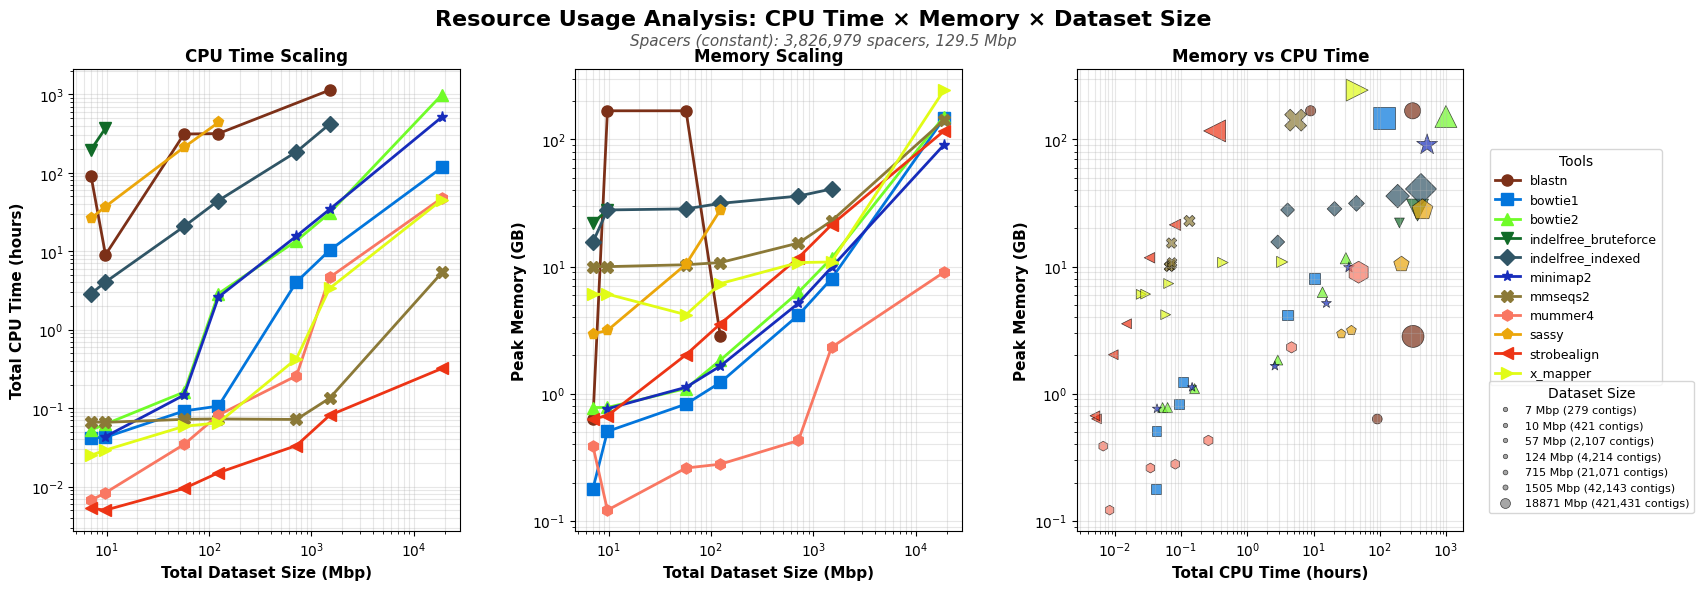

In [83]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json
import numpy as np

# Load tool styles 
with open("notebooks/tool_styles.json", "r") as f:
    tool_styles = json.load(f)

# Create 1 row x 3 columns layout with legend on the right
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3, right=0.82)

# Add title with spacer information
spacer_info_text = f'Spacers (constant): {num_spacers:,} spacers, {total_spacer_Mbp:.1f} Mbp'
fig.suptitle('Resource Usage Analysis: CPU Time × Memory × Dataset Size', 
             fontsize=16, fontweight='bold', y=0.98,)
fig.text(0.5, 0.92, spacer_info_text, ha='center', fontsize=11, style='italic', color='#555555')

tools_list = sorted(completed_jobs["tool_display"].unique().to_list())
fractions_list = sorted(completed_jobs["fraction_float"].unique().to_list())

# Merge contig counts with fractions for x-axis labeling
contig_info = {row['fraction_float']: (row['num_contigs'], row['total_size_Mbp']) 
               for row in contig_counts_df.iter_rows(named=True)}

# Plot 1: CPU Time vs Dataset Size
ax1 = fig.add_subplot(gs[0, 0])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool_display") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        # Use total size in Mbp for x-axis
        sizes_mbp = [contig_info[f][1] for f in fractions]
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        # Extract base tool name for styling
        base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
        color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(base_tool, {}).get("marker", "o")
        ax1.plot(sizes_mbp, cpu_time, marker=marker, color=color, linewidth=2, markersize=8, label=tool)

ax1.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Plot 2: Memory vs Dataset Size
ax2 = fig.add_subplot(gs[0, 1])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool_display") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        sizes_mbp = [contig_info[f][1] for f in fractions]
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        if len(memory) > 0:
            base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
            color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(base_tool, {}).get("marker", "o")
            sizes_to_use = sizes_mbp[:len(memory)]
            ax2.plot(sizes_to_use, memory, marker=marker, color=color, linewidth=2, markersize=8, label=tool)

ax2.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Memory vs CPU Time (colored by dataset size)
ax3 = fig.add_subplot(gs[0, 2])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool_display") == tool)
    cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
    memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
    fraction = tool_data["fraction_float"].to_numpy()
    min_len = min(len(cpu_time), len(memory))
    if min_len > 0:
        base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
        color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(base_tool, {}).get("marker", "o")
        # Map dataset size to marker size
        sizes_mbp_vals = [contig_info[f][1] for f in fraction[:min_len]]
        min_size, max_size = min(sizes_mbp_vals), max(sizes_mbp_vals)
        marker_sizes = 50 + np.array([(s - min_size) / (max_size - min_size) * 200 for s in sizes_mbp_vals])
        ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                   color=color, marker=marker, s=marker_sizes, alpha=0.7, 
                   edgecolors='black', linewidth=0.5, label=tool)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')

# Create unified legend on the right
# Tool legend handles
tool_handles = []
for tool in tools_list:
    base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
    color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
    marker = tool_styles.get(base_tool, {}).get("marker", "o")
    tool_handles.append(Line2D([0], [0], marker=marker, color=color, linewidth=2, 
                               markersize=8, label=tool, linestyle='-'))

# Dataset size legend (show actual Mbp values)
size_handles = []
for frac in fractions_list:
    num_contigs, size_mbp = contig_info[frac]
    size_val = size_mbp
    min_mbp = contig_info[fractions_list[0]][1]
    max_mbp = contig_info[fractions_list[-1]][1]
    marker_size_calc = 50 + (size_val - min_mbp) / (max_mbp - min_mbp) * 200
    markersize = np.sqrt(marker_size_calc / 3.14) * 0.8
    size_handles.append(Line2D([0], [0], marker='o', color='gray', linewidth=0, 
                              markersize=markersize, label=f'{size_mbp:.0f} Mbp ({num_contigs:,} contigs)',
                              markerfacecolor='gray', markeredgecolor='black', 
                              markeredgewidth=0.5, alpha=0.7))

# Place legends on the right side
fig.legend(handles=tool_handles, title='Tools', loc='center left', 
           bbox_to_anchor=(0.83, 0.55), fontsize=9, title_fontsize=10, frameon=True)
fig.legend(handles=size_handles, title='Dataset Size', loc='center left',
           bbox_to_anchor=(0.83, 0.25), fontsize=8, title_fontsize=10, frameon=True)

plt.show()


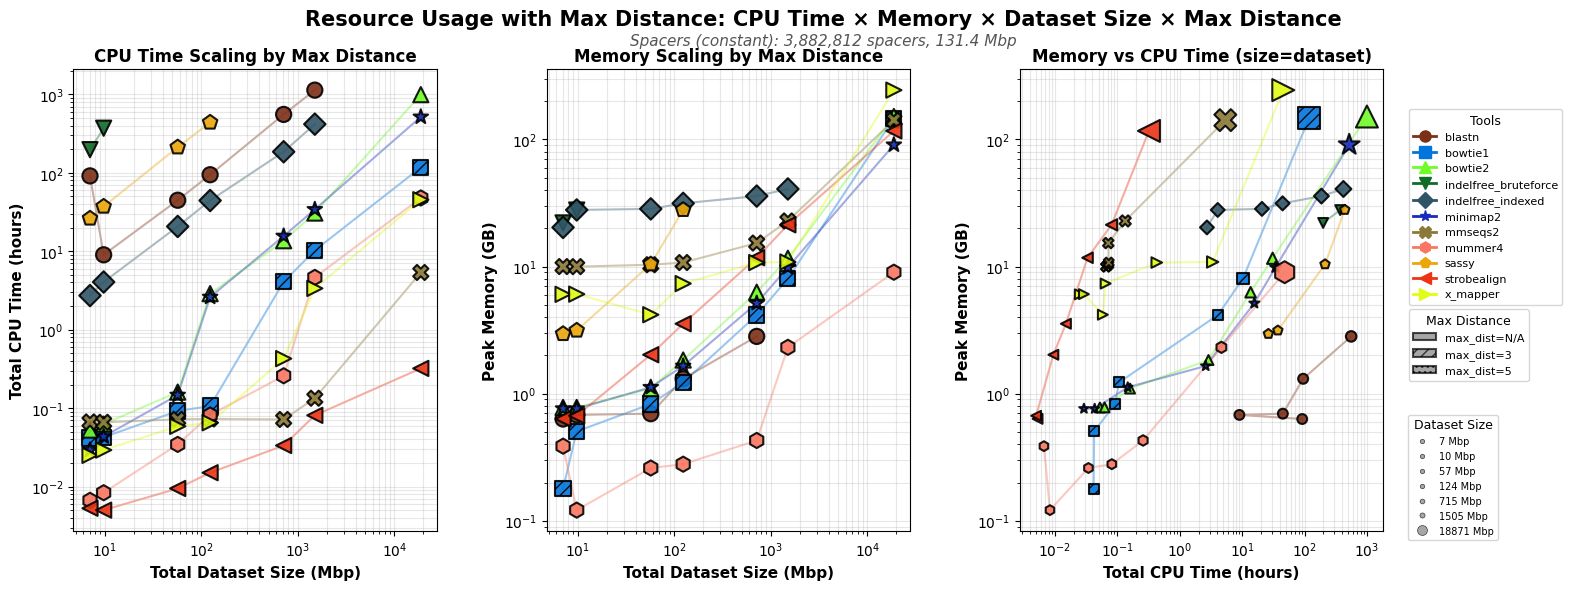

In [ ]:
# Create enhanced figure with max_distance dimension using marker fill patterns
# Simplify max_distance to just N/A, 3, and 5
from matplotlib.patches import Rectangle

def simplify_max_distance(max_dist):
    """Simplify max_distance values to N/A, 3, or 5"""
    if max_dist in ['3', '5']:
        return max_dist
    else:
        return 'N/A'

# Add simplified max_distance column
completed_jobs_plot = completed_jobs.with_columns([
    pl.col("max_distance").map_elements(
        simplify_max_distance,
        return_dtype=pl.Utf8
    ).alias("max_dist_simple")
])

# Define hatch patterns for max_distance (applied to marker faces)
distance_hatches = {
    'N/A': '',       # solid fill (no hatch)
    '3': '///',      # striped pattern
    '5': '...'       # dotted pattern
}

# Create 1 row x 3 columns layout with legend on the right
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3, right=0.78)

# Add title with spacer information
spacer_info_text = f'Spacers (constant): {num_spacers:,} spacers, {total_spacer_Mbp:.1f} Mbp'
fig.suptitle('Resource Usage with Max Distance: CPU Time × Memory × Dataset Size × Max Distance', 
             fontsize=15, fontweight='bold', y=0.98)
fig.text(0.5, 0.92, spacer_info_text, ha='center', fontsize=11, style='italic', color='#555555')

tools_list = sorted(completed_jobs_plot["tool_display"].unique().to_list())
fractions_list = sorted(completed_jobs_plot["fraction_float"].unique().to_list())

# Plot 1: CPU Time vs Dataset Size (with max_distance shown by marker pattern)
ax1 = fig.add_subplot(gs[0, 0])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool_display") == tool) & (pl.col("max_dist_simple") == max_dist)
        ).sort("fraction_float")
        
        if len(tool_data) > 0:
            fractions = tool_data["fraction_float"].to_numpy()
            sizes_mbp = [contig_info[f][1] for f in fractions]
            cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
            base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
            color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(base_tool, {}).get("marker", "o")
            hatch = distance_hatches[max_dist]
            
            # Plot line connecting points
            ax1.plot(sizes_mbp, cpu_time, color=color, linewidth=1.5, alpha=0.4, zorder=1)
            # Plot markers with hatch patterns
            ax1.scatter(sizes_mbp, cpu_time, marker=marker, s=120, 
                       facecolor=color, edgecolor='black', linewidth=1.5, 
                       hatch=hatch, alpha=0.9, zorder=2)

ax1.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling by Max Distance', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Plot 2: Memory vs Dataset Size (with max_distance shown by marker pattern)
ax2 = fig.add_subplot(gs[0, 1])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool_display") == tool) & (pl.col("max_dist_simple") == max_dist)
        ).sort("fraction_float")
        
        if len(tool_data) > 0:
            fractions = tool_data["fraction_float"].to_numpy()
            sizes_mbp = [contig_info[f][1] for f in fractions]
            memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
            if len(memory) > 0:
                base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
                color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
                marker = tool_styles.get(base_tool, {}).get("marker", "o")
                hatch = distance_hatches[max_dist]
                sizes_to_use = sizes_mbp[:len(memory)]
                
                # Plot line connecting points
                ax2.plot(sizes_to_use, memory, color=color, linewidth=1.5, alpha=0.4, zorder=1)
                # Plot markers with hatch patterns
                ax2.scatter(sizes_to_use, memory, marker=marker, s=120,
                           facecolor=color, edgecolor='black', linewidth=1.5,
                           hatch=hatch, alpha=0.9, zorder=2)

ax2.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling by Max Distance', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Memory vs CPU Time (max_distance by marker pattern, dataset size by marker size)
ax3 = fig.add_subplot(gs[0, 2])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool_display") == tool) & (pl.col("max_dist_simple") == max_dist)
        )
        
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        fraction = tool_data["fraction_float"].to_numpy()
        min_len = min(len(cpu_time), len(memory))
        
        if min_len > 0:
            base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
            color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(base_tool, {}).get("marker", "o")
            hatch = distance_hatches[max_dist]
            
            # Map dataset size to marker size
            sizes_mbp_vals = [contig_info[f][1] for f in fraction[:min_len]]
            if len(sizes_mbp_vals) > 0:
                min_size = min(contig_info.values(), key=lambda x: x[1])[1]
                max_size = max(contig_info.values(), key=lambda x: x[1])[1]
                marker_sizes = 50 + np.array([(s - min_size) / (max_size - min_size) * 200 for s in sizes_mbp_vals])
                
                # Plot with connecting line
                ax3.plot(cpu_time[:min_len], memory[:min_len], 
                        color=color, linewidth=1.5, alpha=0.4, zorder=1)
                # Plot markers with hatch patterns and varying sizes
                ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                           marker=marker, s=marker_sizes, facecolor=color, 
                           edgecolor='black', linewidth=1.5, hatch=hatch, 
                           alpha=0.9, zorder=2)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time (size=dataset)', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')

# Create unified legend on the right
# Tool legend handles
tool_handles = []
for tool in tools_list:
    base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
    color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
    marker = tool_styles.get(base_tool, {}).get("marker", "o")
    tool_handles.append(Line2D([0], [0], marker=marker, color=color, linewidth=2, 
                               markersize=8, label=tool, linestyle='-'))

# Max distance legend (using hatch patterns) - create custom patches for better display
distance_handles = []
distance_labels = []
for max_dist in ['N/A', '3', '5']:
    hatch = distance_hatches[max_dist]
    # Create a rectangle patch with the hatch pattern
    patch = Rectangle((0, 0), 1, 1, facecolor='gray', edgecolor='black', 
                     linewidth=1.5, hatch=hatch, alpha=0.7)
    distance_handles.append(patch)
    distance_labels.append(f'max_dist={max_dist}')

# Dataset size legend (show actual Mbp values)
size_handles = []
for frac in fractions_list:
    num_contigs, size_mbp = contig_info[frac]
    min_mbp = contig_info[fractions_list[0]][1]
    max_mbp = contig_info[fractions_list[-1]][1]
    marker_size_calc = 50 + (size_mbp - min_mbp) / (max_mbp - min_mbp) * 200
    markersize = np.sqrt(marker_size_calc / 3.14) * 0.8
    size_handles.append(Line2D([0], [0], marker='o', color='gray', linewidth=0, 
                              markersize=markersize, label=f'{size_mbp:.0f} Mbp',
                              markerfacecolor='gray', markeredgecolor='black', 
                              markeredgewidth=0.5, alpha=0.7))

# Place legends on the right side
fig.legend(handles=tool_handles, title='Tools', loc='center left', 
           bbox_to_anchor=(0.79, 0.65), fontsize=8, title_fontsize=9, frameon=True)
fig.legend(handles=distance_handles, labels=distance_labels, title='Max Distance', loc='center left',
           bbox_to_anchor=(0.79, 0.42), fontsize=8, title_fontsize=9, frameon=True)
fig.legend(handles=size_handles, title='Dataset Size', loc='center left',
           bbox_to_anchor=(0.79, 0.20), fontsize=7, title_fontsize=9, frameon=True)

plt.show()

### TODO: Remove timing in the above plot for TIMEDOUT
### TODO: match the shape size to the shapes in the legend
### TODO: Add another dimension (so 3D) with the max (edit/hamming) distance set for the tools at that run (if set, so only for indelfrees and sassy really)

### NOTE ABOUT MEMORY:
The peak memory from Slurm doesn't mean that is the actual minimum memory required to run the job - the java tools (indelfree) will use what they can but only clear memory when needed (according to Brian).

In [ ]:
# # Debug: Check which tools have data for which fraction sizes
# print("Tools and fraction sizes in completed_jobs:")
# tool_fraction_matrix = completed_jobs.group_by(["tool", "fraction"]).agg([
#     pl.len().alias("count")
# ]).sort(["tool", "fraction"])
# print(tool_fraction_matrix)

# # Pivot to see which combinations are missing
# pivot = completed_jobs.pivot(values="CPU_Time_Hours", index="tool", on="fraction")
# print("\nPivot view (showing which tool-fraction combinations exist):")
# print(pivot)

## Part 2: of the simulated runs (doesn't include all tools, for the fully simulated and semi-synthetic datasets)
Actual job preparation is in Prepare_all_jobs.ipynb

For simulated runs, we analyze resource usage across different simulation scales (various combinations of number of spacers and contigs). Each simulation was run with multiple tools on Slurm.

**Simulated datasets:**
- `ns_50000_nc_5000`: 50k spacers × 5k contigs
- `ns_75000_nc_5000`: 75k spacers × 5k contigs  
- `ns_100000_nc_10000`: 100k spacers × 10k contigs
- `ns_100000_nc_20000`: 100k spacers × 20k contigs
- `ns_500000_nc_100000`: 500k spacers × 100k contigs
- `ns_500_nc_5000_HIGH_INSERTION_RATE`: 500 spacers × 5k contigs (high insertion rate)
- `ns_3826979_nc_421431_real_baseline`: Real baseline (3.8M spacers × 421k contigs)

Each simulation directory contains slurm logs in `slurm_logs/` subdirectory.

In [ ]:
# Get all simulated run directories
import glob
import os
os.chdir('/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/')
from bench import *
from bench.utils.functions import *
from bench.utils.pyseff import *
import polars as pl
pl.Config(tbl_rows=110)

simulated_base_dir = "results/simulated"
simulation_dirs = sorted([d for d in glob.glob(os.path.join(simulated_base_dir, "ns_*")) 
                         if os.path.isdir(d)])

# Display simulation directories
print(f"Found {len(simulation_dirs)} simulation directories:")
for sim_dir in simulation_dirs:
    sim_name = os.path.basename(sim_dir)
    print(f"  - {sim_name}")

Found 7 simulation directories:
  - ns_100000_nc_10000
  - ns_100000_nc_20000
  - ns_3826979_nc_421431_real_baseline
  - ns_500000_nc_100000
  - ns_50000_nc_5000
  - ns_500_nc_5000_HIGH_INSERTION_RATE
  - ns_75000_nc_5000


In [ ]:
# Collect all slurm log files from simulated runs
log_files_simulated = []
for sim_dir in simulation_dirs:
    slurm_log_dir = os.path.join(sim_dir, "slurm_logs")
    if os.path.exists(slurm_log_dir):
        log_files = glob.glob(os.path.join(slurm_log_dir, "*.out"))
        log_files_simulated.extend(log_files)

print(f"Total slurm log files found: {len(log_files_simulated)}")

# Parse log files to extract simulation name, tool name, and job ID
log_files_sim_df = pl.DataFrame({
    "log_file": log_files_simulated
}).with_columns([
    pl.col("log_file").str.extract(r"-(\d+)\.out").alias("BaseJobID"),
    pl.col("log_file").str.extract(r"/(ns_[^/]+)/").alias("simulation"),
    pl.col("log_file").str.extract(r"slurm_logs/(.+)-\d+\.out")
        .str.replace_all("mmseqs", "mmseqs2")
        .alias("tool_name")
])

print(f"\nParsed {len(log_files_sim_df)} log files")
print(f"Unique simulations: {log_files_sim_df['simulation'].n_unique()}")
print(f"Unique tools: {log_files_sim_df['tool_name'].n_unique()}")
print("\nSample of parsed data:")
log_files_sim_df.head(10)

Total slurm log files found: 79

Parsed 79 log files
Unique simulations: 7
Unique tools: 11

Sample of parsed data:


log_file,BaseJobID,simulation,tool_name
str,str,str,str
"""results/simulated/ns_100000_nc_10000/slurm_logs/blastn-20697887.out""","""20697887""","""ns_100000_nc_10000""","""blastn"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/bowtie1-20697889.out""","""20697889""","""ns_100000_nc_10000""","""bowtie1"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/bowtie1-20704670.out""","""20704670""","""ns_100000_nc_10000""","""bowtie1"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/bowtie2-20697890.out""","""20697890""","""ns_100000_nc_10000""","""bowtie2"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/indelfree_bruteforce-20697892.out""","""20697892""","""ns_100000_nc_10000""","""indelfree_bruteforce"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/indelfree_indexed-20697894.out""","""20697894""","""ns_100000_nc_10000""","""indelfree_indexed"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/minimap2-20697895.out""","""20697895""","""ns_100000_nc_10000""","""minimap2"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/mmseqs-20697897.out""","""20697897""","""ns_100000_nc_10000""","""mmseqs2"""
"""results/simulated/ns_100000_nc_10000/slurm_logs/mummer4-20697898.out""","""20697898""","""ns_100000_nc_10000""","""mummer4"""


In [ ]:
# Get sacct data for simulated runs
sacct_df_sim = pyseff(remove_cancelled=False, remove_failed=False, 
                      calculate_cpu_efficiency=False, calculate_memory_efficiency=False)

# Clean tool names (same as Part 1)
sacct_df_sim = sacct_df_sim.with_columns(
    pl.col("JobName").str.replace_all("_long", "").str.replace_all("mmseqs", "mmseqs2")
)

# Join with log files to get simulation context
log_files_sim_df = log_files_sim_df.join(sacct_df_sim, on="BaseJobID", how="inner")

print(f"Matched {len(log_files_sim_df)} jobs with sacct data")
log_files_sim_df

Matched 79 jobs with sacct data


log_file,BaseJobID,simulation,tool_name,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,str,str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""results/simulated/ns_3826979_nc_421431_real_baseline/slurm_logs/strobealign-20697709.out""","""20697709""","""ns_3826979_nc_421431_real_baseline""","""strobealign""","""strobealign""",38,"[""COMPLETED""]","[""0:0""]","""97816924K""","""250G""",838,0,95524.339844,256000.0,"""00:13:58""","""00:00:00"""
"""results/simulated/ns_75000_nc_5000/slurm_logs/indelfree_indexed-20697941.out""","""20697941""","""ns_75000_nc_5000""","""indelfree_indexed""","""indelfree_indexed""",38,"[""COMPLETED""]","[""0:0""]","""89260236K""","""168G""",507,9132,87168.199219,172032.0,"""00:08:27""","""02:32:12"""
"""results/simulated/ns_500000_nc_100000/slurm_logs/bowtie1-20697918.out""","""20697918""","""ns_500000_nc_100000""","""bowtie1""","""bowtie1""",38,"[""COMPLETED""]","[""0:0""]","""233113952K""","""250G""",108414,456792,227650.34375,256000.0,"""1-06:06:54""","""5-06:53:12"""
"""results/simulated/ns_100000_nc_20000/slurm_logs/bowtie1-20704671.out""","""20704671""","""ns_100000_nc_20000""","""bowtie1""","""bowtie1""",38,"[""COMPLETED""]","[""0:0""]","""8524488K""","""250G""",2503,24898,8324.695312,256000.0,"""00:41:43""","""06:54:58"""
"""results/simulated/ns_100000_nc_20000/slurm_logs/mmseqs-20697912.out""","""20697912""","""ns_100000_nc_20000""","""mmseqs2""","""mmseqs2""",38,"[""COMPLETED""]","[""0:0""]","""21138820K""","""250G""",154,0,20643.378906,256000.0,"""00:02:34""","""00:00:00"""
"""results/simulated/ns_100000_nc_20000/slurm_logs/bowtie1-20697906.out""","""20697906""","""ns_100000_nc_20000""","""bowtie1""","""bowtie1""",38,"[""FAILED"", ""COMPLETED""]","[""1:0"", ""0:0""]","""8697116K""","""250G""",3022,38174,8493.277344,256000.0,"""00:50:22""","""10:36:14"""
"""results/simulated/ns_50000_nc_5000/slurm_logs/indelfree_bruteforce-20697929.out""","""20697929""","""ns_50000_nc_5000""","""indelfree_bruteforce""","""indelfree_bruteforce""",38,"[""COMPLETED""]","[""0:0""]","""89614220K""","""168G""",37728,904736,87513.886719,172032.0,"""10:28:48""","""10-11:18:56"""
"""results/simulated/ns_500000_nc_100000/slurm_logs/blastn-20697917.out""","""20697917""","""ns_500000_nc_100000""","""blastn""","""blastn""",38,"[""COMPLETED""]","[""0:0""]","""34687324K""","""250G""",750438,9281248,33874.339844,256000.0,"""8-16:27:18""","""107-10:07:28"""
"""results/simulated/ns_500_nc_5000_HIGH_INSERTION_RATE/slurm_logs/indelfree_indexed-20697872.out""","""20697872""","""ns_500_nc_5000_HIGH_INSERTION_RATE""","""indelfree_indexed""","""indelfree_indexed""",38,"[""COMPLETED""]","[""0:0""]","""7922108K""","""168G""",57,0,7736.433594,172032.0,"""00:00:57""","""00:00:00"""


In [ ]:
# Get dataset sizes for each simulation
def get_simulation_stats(sim_dir, 
                         spacers_filename=None, 
                         contigs_filename=None):
    """Extract number of spacers and contigs from simulation directory"""
    sim_data_dir = os.path.join(sim_dir, "simulated_data")
    
    # Get spacer count and size
    spacer_file = spacers_filename if spacers_filename is not None else os.path.join(sim_data_dir, "simulated_spacers.fa")
    contig_file = contigs_filename if contigs_filename is not None else os.path.join(sim_data_dir, "simulated_contigs.fa")

    if os.path.exists(spacer_file):
        spacer_df = pl.DataFrame(read_fasta_needletail(spacer_file), schema={'seqid': pl.Utf8, 'seq': pl.Utf8},)
        spacer_df = spacer_df.with_columns(
            pl.col("seq").str.len_chars().alias("length")
        ).drop("seq")
        num_spacers = spacer_df.height
        total_spacer_bp = spacer_df["length"].sum()
    else:
        num_spacers = 0
        total_spacer_bp = 0
    
    # Get contig count and size
    if os.path.exists(contig_file):
        contig_df = pl.DataFrame(read_fasta_needletail(contig_file), schema={'seqid': pl.Utf8, 'seq': pl.Utf8},)
        contig_df = contig_df.with_columns(
            pl.col("seq").str.len_chars().alias("length")
        ).drop("seq")
        num_contigs = contig_df.height
        total_contig_bp = contig_df["length"].sum()
    else:
        num_contigs = 0
        total_contig_bp = 0
    
    return {
        "num_spacers": num_spacers,
        "total_spacer_bp": total_spacer_bp,
        "total_spacer_Mbp": total_spacer_bp / 1_000_000,
        "num_contigs": num_contigs,
        "total_contig_bp": total_contig_bp,
        "total_contig_Mbp": total_contig_bp / 1_000_000,
        "search_space_size": num_spacers * num_contigs
    }

# Collect stats for all simulations
sim_stats_list = []
for sim_dir in simulation_dirs:
    sim_name = os.path.basename(sim_dir)
    if sim_name == "ns_3826979_nc_421431_real_baseline":
        # Special case: different spacer/contig filenames
        stats = get_simulation_stats(
            sim_dir, 
            spacers_filename="imgvr4_data/spacers/iphop_filtered_spacers.fna", # probably not necceary as the subsample would have made a copy of this file into simulated_data
        )
    else:
        stats = get_simulation_stats(sim_dir)
    stats["simulation"] = sim_name
    sim_stats_list.append(stats)

sim_stats_df = pl.DataFrame(sim_stats_list).sort("search_space_size")

print("Simulation Dataset Statistics:")
sim_stats_df

Simulation Dataset Statistics:


num_spacers,total_spacer_bp,total_spacer_Mbp,num_contigs,total_contig_bp,total_contig_Mbp,search_space_size,simulation
i64,i64,f64,i64,i64,f64,i64,str
500,16007,0.016007,5000,400779688,400.779688,2500000,"""ns_500_nc_5000_HIGH_INSERTION_RATE"""
50000,1599652,1.599652,5000,402606570,402.60657,250000000,"""ns_50000_nc_5000"""
75000,2401592,2.401592,5000,401074812,401.074812,375000000,"""ns_75000_nc_5000"""
100000,3201222,3.201222,10000,802832723,802.832723,1000000000,"""ns_100000_nc_10000"""
100000,3200186,3.200186,20000,1604143975,1604.143975,2000000000,"""ns_100000_nc_20000"""
500000,16002956,16.002956,100000,2232675503,2232.675503,50000000000,"""ns_500000_nc_100000"""
3826979,129494053,129.494053,421431,4291112041,4291.112041,1612807586949,"""ns_3826979_nc_421431_real_baseline"""


In [ ]:
# Process simulated jobs similar to Part 1
# Mark job states and handle retries
log_files_sim_df = log_files_sim_df.with_columns([
    pl.col("State").list.get(0).alias("state_first"),
])

# Categorize job states
exclude_states = ['OUT_OF_MEMORY', 'CANCELLED', 'PREEMPTED', 'RUNNING']
log_files_sim_df = log_files_sim_df.with_columns([
    pl.col("state_first").is_in(exclude_states).alias("should_exclude"),
    pl.col("state_first").str.contains("TIMEOUT").fill_null(False).alias("is_timeout"),
    pl.col("state_first").str.contains("COMPLETED").fill_null(False).alias("is_completed"),
    pl.col("state_first").str.contains("FAILED").fill_null(False).alias("is_failed"),
])

# For each (simulation, tool) pair, select the best job (completed jobs only)
processed_jobs_sim = log_files_sim_df.filter(
    pl.col("is_completed") & ~pl.col("should_exclude")
).group_by(["simulation", "tool_name"]).agg([
    pl.col("BaseJobID").first(),
    pl.col("Elapsed_Seconds").first(),
    pl.col("TotalCPU_Seconds").first(),
    pl.col("MaxRSS_MB").first(),
    pl.col("ReqMem_MB").first(),
    pl.col("AllocCPUS").first(),
])

# Add derived metrics
processed_jobs_sim = processed_jobs_sim.with_columns([
    # Use TotalCPU if available and > 1, otherwise use Elapsed
    pl.when(pl.col("TotalCPU_Seconds") >= 1)
        .then(pl.col("TotalCPU_Seconds"))
        .otherwise(pl.col("Elapsed_Seconds"))
        .alias("CPU_Time_Seconds"),
    (pl.col("MaxRSS_MB") / 1024).alias("Peak_Memory_Gb"),
])

processed_jobs_sim = processed_jobs_sim.with_columns([
    (pl.col("CPU_Time_Seconds") / 3600).alias("CPU_Time_Hours"),
    (pl.col("Elapsed_Seconds") / 3600).alias("Walltime_Hours"),
])

# Merge with simulation stats
processed_jobs_sim = processed_jobs_sim.join(sim_stats_df, on="simulation", how="left")

print(f"Processed {len(processed_jobs_sim)} completed jobs")
print(f"Simulations: {processed_jobs_sim['simulation'].n_unique()}")
print(f"Tools: {processed_jobs_sim['tool_name'].n_unique()}")
processed_jobs_sim

Processed 70 completed jobs
Simulations: 7
Tools: 11


simulation,tool_name,BaseJobID,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,CPU_Time_Seconds,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,num_spacers,total_spacer_bp,total_spacer_Mbp,num_contigs,total_contig_bp,total_contig_Mbp,search_space_size
str,str,str,u32,u32,f64,f64,i64,u32,f64,f64,f64,i64,i64,f64,i64,i64,f64,i64
"""ns_100000_nc_20000""","""bowtie1""","""20704671""",2503,24898,8324.695312,256000.0,38,24898,8.129585,6.916111,0.695278,100000,3200186,3.200186,20000,1604143975,1604.143975,2000000000
"""ns_100000_nc_20000""","""mmseqs2""","""20697912""",154,0,20643.378906,256000.0,38,154,20.15955,0.042778,0.042778,100000,3200186,3.200186,20000,1604143975,1604.143975,2000000000
"""ns_100000_nc_20000""","""minimap2""","""20697911""",189,0,10223.367188,256000.0,38,189,9.983757,0.0525,0.0525,100000,3200186,3.200186,20000,1604143975,1604.143975,2000000000
"""ns_100000_nc_20000""","""sassy""","""20697914""",20659,508682,153.882812,256000.0,38,508682,0.150276,141.300556,5.738611,100000,3200186,3.200186,20000,1604143975,1604.143975,2000000000
"""ns_75000_nc_5000""","""blastn""","""20697937""",1086,17576,707.757812,172032.0,38,17576,0.69117,4.882222,0.301667,75000,2401592,2.401592,5000,401074812,401.074812,375000000
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""minimap2""","""20697873""",48,0,2750.324219,172032.0,38,48,2.685863,0.013333,0.013333,500,16007,0.016007,5000,400779688,400.779688,2500000
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""sassy""","""20697876""",96,0,92.507812,172032.0,38,96,0.09034,0.026667,0.026667,500,16007,0.016007,5000,400779688,400.779688,2500000
"""ns_50000_nc_5000""","""strobealign""","""20697935""",15,0,2324.105469,172032.0,38,15,2.269634,0.004167,0.004167,50000,1599652,1.599652,5000,402606570,402.60657,250000000
"""ns_500000_nc_100000""","""blastn""","""20697917""",750438,9281248,33874.339844,256000.0,38,9281248,33.08041,2578.124444,208.455,500000,16002956,16.002956,100000,2232675503,2232.675503,50000000000


In [81]:
# Add max_distance information based on simulation configuration
# Reference: Prepare_all_jobs.ipynb configurations

def get_max_distance_simulated(simulation_name, tool_name):
    """
    Determine the max_distance setting for a given simulation and tool.
    Based on Prepare_all_jobs.ipynb configurations.
    
    Returns a string describing the max_distance setting:
    - For tools with fixed edit distance (indelfree, sassy): returns the numeric value
    - For bowtie1: always returns "3" (max supported)
    - For blastn/mmseqs2: returns descriptive text about their similarity thresholds
    - For other tools: returns "N/A"
    """
    # Simulation-specific max_distance configurations from Prepare_all_jobs.ipynb
    # Smaller simulated datasets: max_distance=5
    smaller_simulated = [
        'ns_50000_nc_5000',
        'ns_75000_nc_5000', 
        'ns_500_nc_5000_HIGH_INSERTION_RATE',
    ]
    
    # Larger simulated datasets with varying max_distance
    larger_simulated_configs = {
        'ns_100000_nc_10000': 5,
        'ns_100000_nc_20000': 5,
        'ns_500000_nc_100000': 3,  # Reduced for compute efficiency
        'ns_3826979_nc_421431_real_baseline': 3  # Semi-synthetic baseline
    }
    
    # Determine configured max_distance for this simulation
    if simulation_name in smaller_simulated:
        configured_max_dist = 5
    elif simulation_name in larger_simulated_configs:
        configured_max_dist = larger_simulated_configs[simulation_name]
    else:
        configured_max_dist = None
    
    # Tool-specific handling (same logic as Part 1)
    if tool_name in ['indelfree_bruteforce', 'indelfree_indexed', 'sassy']:
        return str(configured_max_dist) if configured_max_dist is not None else "N/A"
    elif tool_name == 'bowtie1':
        return "3"  # Always max supported
    elif tool_name == 'blastn':
        return "perc_id=84%"
    elif tool_name == 'mmseqs2':
        return "min-seq-id=85%"
    else:
        return "N/A"

# Apply max_distance to processed jobs
processed_jobs_sim = processed_jobs_sim.with_columns([
    pl.struct(["simulation", "tool_name"]).map_elements(
        lambda x: get_max_distance_simulated(x["simulation"], x["tool_name"]),
        return_dtype=pl.Utf8
    ).alias("max_distance_setting")
])

# Add tool_display column (same function as Part 1)
def get_tool_display_name(tool, max_dist):
    """Add suffix to tool names that have variable max_distance settings"""
    if tool in ['indelfree_bruteforce', 'indelfree_indexed', 'sassy']:
        if max_dist.isdigit():
            return f"{tool}_d{max_dist}"
    return tool

processed_jobs_sim = processed_jobs_sim.with_columns([
    pl.struct(["tool_name", "max_distance_setting"]).map_elements(
        lambda x: get_tool_display_name(x["tool_name"], x["max_distance_setting"]),
        return_dtype=pl.Utf8
    ).alias("tool_display")
])

print("Max distance settings by simulation and tool:")
max_dist_summary_sim = processed_jobs_sim.group_by(["simulation", "tool_name", "tool_display", "max_distance_setting"]).agg([
    pl.len().alias("count")
]).sort(["simulation", "tool_display"])
print(max_dist_summary_sim)

Max distance settings by simulation and tool:
shape: (70, 5)
┌────────────────────────────────────┬──────────────────────┬─────────────────────────┬──────────────────────┬───────┐
│ simulation                         ┆ tool_name            ┆ tool_display            ┆ max_distance_setting ┆ count │
│ ---                                ┆ ---                  ┆ ---                     ┆ ---                  ┆ ---   │
│ str                                ┆ str                  ┆ str                     ┆ str                  ┆ u64   │
╞════════════════════════════════════╪══════════════════════╪═════════════════════════╪══════════════════════╪═══════╡
│ ns_100000_nc_10000                 ┆ blastn               ┆ blastn                  ┆ perc_id=84%          ┆ 1     │
│ ns_100000_nc_10000                 ┆ bowtie1              ┆ bowtie1                 ┆ 3                    ┆ 1     │
│ ns_100000_nc_10000                 ┆ bowtie2              ┆ bowtie2                 ┆ N/A               

## Max Distance Settings for Simulated Runs

Based on Prepare_all_jobs.ipynb configurations:

**Smaller simulations (max_distance=5):**
- ns_50000_nc_5000
- ns_75000_nc_5000
- ns_500_nc_5000_HIGH_INSERTION_RATE

**Larger simulations:**
- ns_100000_nc_10000: max_distance=5
- ns_100000_nc_20000: max_distance=5  
- ns_500000_nc_100000: max_distance=3 (reduced for compute efficiency, excludes sassy/indelfree_bruteforce)
- ns_3826979_nc_421431_real_baseline: max_distance=3 (semi-synthetic baseline, excludes sassy/indelfree_bruteforce)

**Tool-specific notes:**
- **indelfree_bruteforce/indexed, sassy**: Use the configured max_distance (edit/hamming distance)
- **bowtie1**: Fixed at max_distance=3 (maximum supported by -v flag)
- **blastn**: Uses perc_identity=84% and qcov_hsp_perc=80% (not fixed edit distance)
- **mmseqs2**: Uses min-seq-id=85% (not fixed edit distance)
- **Other tools** (bowtie2, minimap2, strobealign, mummer4, x_mapper): Do not use max_distance constraints

In [ ]:
# Check for failed/timeout jobs in simulated runs
failed_jobs_sim = log_files_sim_df.filter(
    ~pl.col("is_completed") & ~pl.col("should_exclude")
).select([
    "simulation", "tool_name", "BaseJobID", "state_first", 
    "Elapsed_Seconds", "AllocCPUS"
]).with_columns([
    (pl.col("Elapsed_Seconds") / 3600).round(2).alias("Time_Hours")
])

if len(failed_jobs_sim) > 0:
    print(f"FAILED/TIMEOUT JOBS: {len(failed_jobs_sim)} total")
    print(failed_jobs_sim)
    
    # Summary by tool
    failure_summary_sim = failed_jobs_sim.group_by("tool_name").agg([
        pl.len().alias("num_failures")
    ]).sort("num_failures", descending=True)
    print("\nFailure Summary by Tool:")
    print(failure_summary_sim)
else:
    print("✓ All simulated jobs completed successfully!")

FAILED/TIMEOUT JOBS: 8 total
shape: (8, 7)
┌────────────────────────────────────┬───────────────────┬───────────┬─────────────┬─────────────────┬───────────┬────────────┐
│ simulation                         ┆ tool_name         ┆ BaseJobID ┆ state_first ┆ Elapsed_Seconds ┆ AllocCPUS ┆ Time_Hours │
│ ---                                ┆ ---               ┆ ---       ┆ ---         ┆ ---             ┆ ---       ┆ ---        │
│ str                                ┆ str               ┆ str       ┆ str         ┆ u32             ┆ i64       ┆ f64        │
╞════════════════════════════════════╪═══════════════════╪═══════════╪═════════════╪═════════════════╪═══════════╪════════════╡
│ ns_100000_nc_20000                 ┆ bowtie1           ┆ 20697906  ┆ FAILED      ┆ 3022            ┆ 38        ┆ 0.84       │
│ ns_50000_nc_5000                   ┆ bowtie1           ┆ 20697927  ┆ FAILED      ┆ 556             ┆ 38        ┆ 0.15       │
│ ns_500000_nc_100000                ┆ x_mapper          ┆ 20

In [ ]:
# Summary statistics by tool across all simulations
tool_summary_sim = processed_jobs_sim.group_by("tool_display").agg([
    pl.col("tool_name").first().alias("base_tool"),
    pl.col("max_distance_setting").unique().alias("max_distances"),
    pl.col("CPU_Time_Hours").mean().alias("Avg_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").min().alias("Min_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").max().alias("Max_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").sum().alias("Total_CPU_Time_Hours"),
    pl.col("Peak_Memory_Gb").mean().alias("Avg_Peak_Memory_Gb"),
    pl.col("Peak_Memory_Gb").max().alias("Max_Peak_Memory_Gb"),
    pl.col("AllocCPUS").unique().alias("CPU_Allocations_Used"),
    pl.len().alias("Num_Simulations")
]).sort("Avg_CPU_Time_Hours")

print("Tool Summary Statistics (Simulated Runs)")
print("Note: CPU Time is total CPU time from Slurm TotalCPU")
tool_summary_sim

Tool Summary Statistics (Simulated Runs)
Note: CPU Time is total CPU time from Slurm TotalCPU


tool_name,Avg_CPU_Time_Hours,Min_CPU_Time_Hours,Max_CPU_Time_Hours,Total_CPU_Time_Hours,Avg_Peak_Memory_Gb,Max_Peak_Memory_Gb,CPU_Allocations_Used,Num_Simulations
str,f64,f64,f64,f64,f64,f64,list[i64],u64
"""strobealign""",0.071151,0.004167,0.232778,0.498056,36.130708,141.825691,[38],7
"""mmseqs2""",2.147222,0.024167,8.298889,15.030556,65.354014,217.163517,[38],7
"""x_mapper""",5.751111,0.04,32.103889,34.506667,54.057505,229.822166,[38],6
"""mummer4""",12.444325,0.040833,72.123889,87.110278,3.398307,20.543667,[38],7
"""bowtie1""",37.158175,2.991667,126.886667,260.107222,61.254151,222.314789,[38],7
"""sassy""",50.738333,0.026667,141.300556,253.691667,0.098599,0.150276,[38],5
"""indelfree_indexed""",72.736991,0.015833,414.513889,436.421944,49.720816,85.125195,[38],6
"""minimap2""",74.506508,0.013333,451.039444,521.545556,27.182028,89.593246,[38],7
"""bowtie2""",120.035873,0.18,618.215,840.251111,57.53741,208.148857,[38],7


DETAILED PERFORMANCE: CPU Time × Memory by Simulation and Tool  
**Note**: max_distance_setting shows the configured distance threshold for each tool


In [ ]:
# Detailed performance by simulation and tool
performance_by_simulation = processed_jobs_sim.select([
    "simulation", "tool_display", "tool_name", "max_distance_setting", "search_space_size",
    "num_spacers", "num_contigs", 
    "total_spacer_Mbp", "total_contig_Mbp",
    "AllocCPUS", "CPU_Time_Hours", "Peak_Memory_Gb"
]).sort(["search_space_size", "tool_display"])

performance_by_simulation

simulation,tool_name,max_distance_setting,search_space_size,num_spacers,num_contigs,total_spacer_Mbp,total_contig_Mbp,AllocCPUS,CPU_Time_Hours,Peak_Memory_Gb
str,str,str,i64,i64,i64,f64,f64,i64,f64,f64
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""blastn""","""perc_id=84%""",2500000,500,5000,0.016007,400.779688,38,0.025,1.460548
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""bowtie1""","""3""",2500000,500,5000,0.016007,400.779688,38,2.991667,3.639755
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""bowtie2""","""N/A""",2500000,500,5000,0.016007,400.779688,38,0.184444,4.088547
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""indelfree_bruteforce""","""5""",2500000,500,5000,0.016007,400.779688,38,0.18,27.469902
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""indelfree_indexed""","""5""",2500000,500,5000,0.016007,400.779688,38,0.015833,7.555111
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""minimap2""","""N/A""",2500000,500,5000,0.016007,400.779688,38,0.013333,2.685863
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""mmseqs2""","""min-seq-id=85%""",2500000,500,5000,0.016007,400.779688,38,0.035833,11.205273
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""mummer4""","""N/A""",2500000,500,5000,0.016007,400.779688,38,0.068333,0.275127
"""ns_500_nc_5000_HIGH_INSERTION_RATE""","""sassy""","""5""",2500000,500,5000,0.016007,400.779688,38,0.026667,0.09034


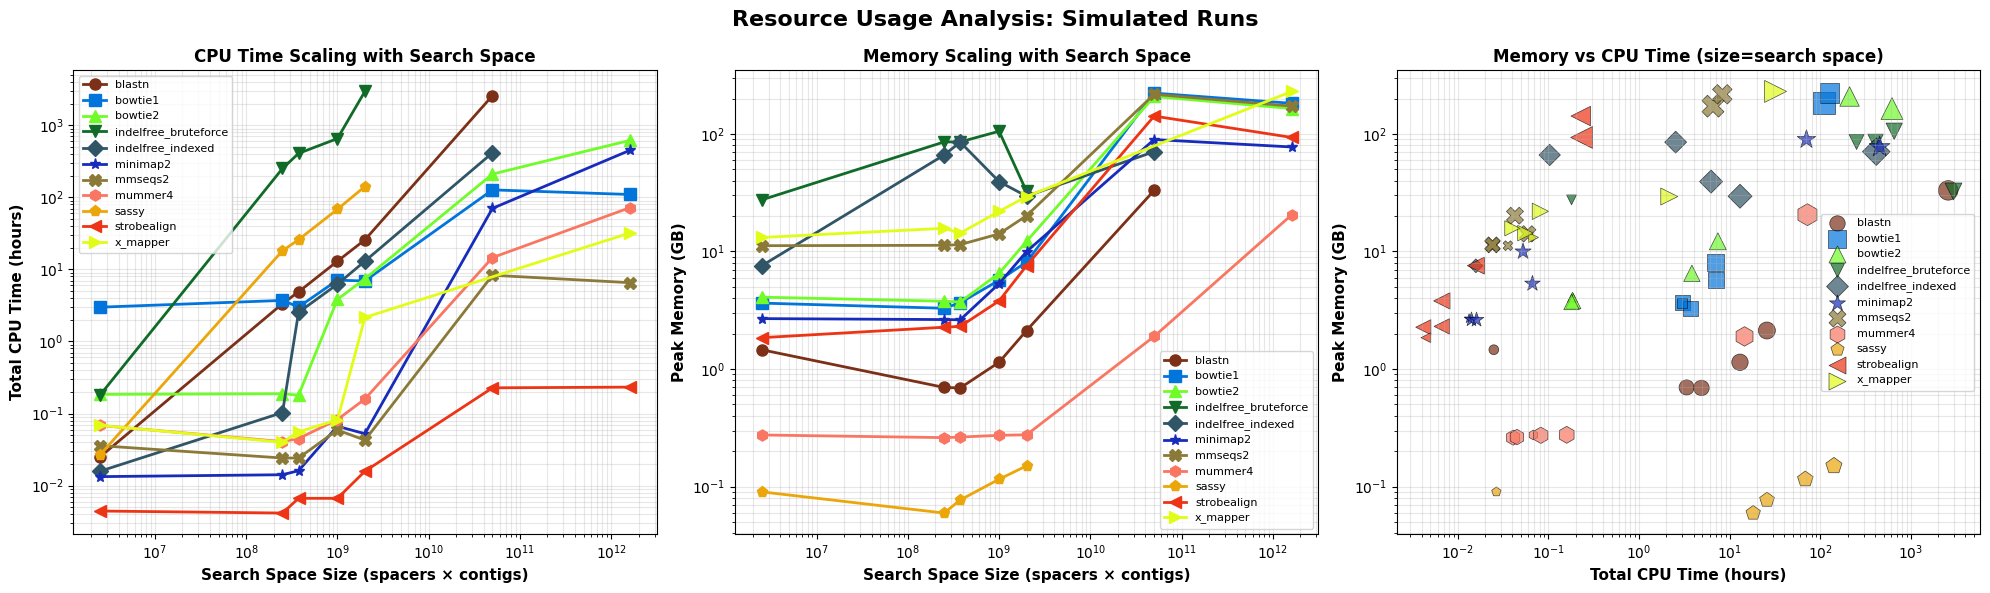

In [ ]:
# Visualization: Resource usage scaling with simulation size
import matplotlib.pyplot as plt
import numpy as np
import json

# Load tool styles
with open("notebooks/tool_styles.json", "r") as f:
    tool_styles = json.load(f)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Get unique tools
tools_list_sim = sorted(processed_jobs_sim["tool_display"].unique().to_list())

# Plot 1: CPU Time vs Search Space Size
ax1 = axes[0]
for tool in tools_list_sim:
    tool_data = processed_jobs_sim.filter(pl.col("tool_display") == tool).sort("search_space_size")
    if len(tool_data) > 0:
        search_space = tool_data["search_space_size"].to_numpy()
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
        color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(base_tool, {}).get("marker", "o")
        ax1.plot(search_space, cpu_time, marker=marker, color=color, 
                linewidth=2, markersize=8, label=tool)

ax1.set_xlabel('Search Space Size (spacers × contigs)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling with Search Space', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')
ax1.legend(fontsize=8, loc='best')

# Plot 2: Memory vs Search Space Size
ax2 = axes[1]
for tool in tools_list_sim:
    tool_data = processed_jobs_sim.filter(pl.col("tool_display") == tool).sort("search_space_size")
    if len(tool_data) > 0:
        search_space = tool_data["search_space_size"].to_numpy()
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        if len(memory) > 0:
            base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
            color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(base_tool, {}).get("marker", "o")
            search_space_to_use = search_space[:len(memory)]
            ax2.plot(search_space_to_use, memory, marker=marker, color=color,
                    linewidth=2, markersize=8, label=tool)

ax2.set_xlabel('Search Space Size (spacers × contigs)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling with Search Space', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(fontsize=8, loc='best')

# Plot 3: Memory vs CPU Time (colored by search space size)
ax3 = axes[2]
for tool in tools_list_sim:
    tool_data = processed_jobs_sim.filter(pl.col("tool_display") == tool)
    cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
    memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
    search_space = tool_data["search_space_size"].to_numpy()
    min_len = min(len(cpu_time), len(memory))
    
    if min_len > 0:
        base_tool = tool.rsplit('_d', 1)[0] if '_d' in tool else tool
        color = tool_styles.get(base_tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(base_tool, {}).get("marker", "o")
        
        # Map search space to marker size
        search_vals = search_space[:min_len]
        min_search = processed_jobs_sim["search_space_size"].min()
        max_search = processed_jobs_sim["search_space_size"].max()
        
        # Logarithmic scaling for marker sizes
        marker_sizes = 50 + np.array([
            200 * (np.log10(s) - np.log10(min_search)) / 
            (np.log10(max_search) - np.log10(min_search))
            for s in search_vals
        ])
        
        ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                   color=color, marker=marker, s=marker_sizes, alpha=0.7,
                   edgecolors='black', linewidth=0.5, label=tool)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time (size=search space)', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')
ax3.legend(fontsize=8, loc='best')

plt.suptitle('Resource Usage Analysis: Simulated Runs', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig("results/simulated/plots/resource_usage.svg",dpi=190)
plt.show()

### TODO: add max_distance like in the plot for the real data
### TODO: only keep 1 legend
### TODO: Decide if the connecting line is really meaningful or just adds clutter.

### Summary by Simulation:  
Note: max_distances_used shows all unique distance settings across tools in that simulation


In [ ]:
# Summary statistics grouped by simulation
sim_summary = processed_jobs_sim.group_by("simulation").agg([
    pl.col("num_spacers").first(),
    pl.col("num_contigs").first(),
    pl.col("search_space_size").first(),
    pl.col("total_spacer_Mbp").first().round(2),
    pl.col("total_contig_Mbp").first().round(2),
    pl.col("max_distance_setting").unique().alias("max_distances_used"),
    pl.col("CPU_Time_Hours").mean().alias("Avg_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").sum().alias("Total_CPU_Time_Hours"),
    pl.col("Peak_Memory_Gb").mean().alias("Avg_Peak_Memory_Gb"),
    pl.col("Peak_Memory_Gb").max().alias("Max_Peak_Memory_Gb"),
    pl.col("tool_name").n_unique().alias("Num_Tools")
]).sort("search_space_size")

sim_summary

simulation,num_spacers,num_contigs,search_space_size,total_spacer_Mbp,total_contig_Mbp,max_distances_used,Avg_CPU_Time_Hours,Total_CPU_Time_Hours,Avg_Peak_Memory_Gb,Max_Peak_Memory_Gb,Num_Tools
str,i64,i64,i64,f64,f64,list[str],f64,f64,f64,f64,u64
"""ns_500_nc_5000_HIGH_INSERTION_RATE""",500,5000,2500000,0.02,400.78,"[""N/A"", ""5"", … ""min-seq-id=85%""]",0.328561,3.614167,6.679746,27.469902,11
"""ns_50000_nc_5000""",50000,5000,250000000,1.6,402.61,"[""N/A"", ""perc_id=84%"", … ""min-seq-id=85%""]",25.179394,276.973333,17.426079,85.46278,11
"""ns_75000_nc_5000""",75000,5000,375000000,2.4,401.07,"[""perc_id=84%"", ""N/A"", … ""min-seq-id=85%""]",40.325758,443.583333,19.064709,85.466595,11
"""ns_100000_nc_10000""",100000,10000,1000000000,3.2,802.83,"[""perc_id=84%"", ""N/A"", … ""min-seq-id=85%""]",68.433232,752.765556,18.508971,105.351448,11
"""ns_100000_nc_20000""",100000,20000,2000000000,3.2,1604.14,"[""3"", ""min-seq-id=85%"", … ""perc_id=84%""]",285.946944,3145.416389,13.803971,32.379257,11
"""ns_500000_nc_100000""",500000,100000,50000000000,16.0,2232.68,"[""perc_id=84%"", ""N/A"", … ""3""]",427.903437,3423.2275,123.081759,222.314789,8
"""ns_3826979_nc_421431_real_baseline""",3826979,421431,1612807586949,129.49,4291.11,"[""min-seq-id=85%"", ""3"", ""N/A""]",184.250476,1289.753333,134.216832,229.822166,7
